In [ ]:
%cd ..

/content/drive/My Drive


In [ ]:
!pip install patool
!pip install pyvi

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 8.5MB 5.3MB/s 
     |████████████████████████████████| 747kB 31.0MB/s 


In [3]:
# import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from collections import Counter
import codecs
import re
# from pyvi import ViTokenizer, ViPosTagger

# Đọc dữ liệu

In [ ]:
patoolib.extract_archive("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar", outdir="/content/")
patoolib.extract_archive("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar extracted to `/content/'.
patool: Extracting /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar"
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar extracted to `/content'.


'/content'

## Train

In [ ]:
path = "/content/"
trainDir = os.listdir(path + "Train_Full")

In [ ]:
trainDir

['The gioi',
 'Vi tinh',
 'Suc khoe',
 'Phap luat',
 'Kinh doanh',
 'Van hoa',
 'Khoa hoc',
 'Doi song',
 'The thao',
 'Chinh tri Xa hoi']

In [ ]:
X_train = []
y_train = []
for category in trainDir:
  print("Category: " + category)
  fileCa = os.listdir(path + "Train_Full/" + category)
  for filename in fileCa:
    # print(filename)
    with open(path + "Train_Full/" + category + "/" + filename, encoding='utf-16') as f:
    # with codecs.open(path + "Train_Full/" + category + "/" + filename, encoding='utf-8') as f:
      data = f.read()
      # data = data.decode("utf-8")
      X_train.append(data)
      y_train.append(category)
  print("-----------------------")

Category: The gioi
-----------------------
Category: Vi tinh
-----------------------
Category: Suc khoe
-----------------------
Category: Phap luat
-----------------------
Category: Kinh doanh
-----------------------
Category: Van hoa
-----------------------
Category: Khoa hoc
-----------------------
Category: Doi song
-----------------------
Category: The thao
-----------------------
Category: Chinh tri Xa hoi
-----------------------


## Test

In [ ]:
testDir = os.listdir(path + "Test_Full")
X_test = []
y_test = []
for category in testDir:
  print("Category: " + category)
  fileCa = os.listdir(path + "Test_Full/" + category)
  for filename in fileCa:
    # print(filename)
    with open(path + "Test_Full/" + category + "/" + filename, encoding='utf-16') as f:
    # with codecs.open(path + "Train_Full/" + category + "/" + filename, encoding='utf-8') as f:
      data = f.read()
      # data = data.decode("utf-8")
      X_test.append(data)
      y_test.append(category)
  print("-----------------------")

Category: The gioi
-----------------------
Category: Vi tinh
-----------------------
Category: Suc khoe
-----------------------
Category: Phap luat
-----------------------
Category: Kinh doanh
-----------------------
Category: Van hoa
-----------------------
Category: Khoa hoc
-----------------------
Category: Doi song
-----------------------
Category: The thao
-----------------------
Category: Chinh tri Xa hoi
-----------------------


##Kiểm tra xem có văn bản nào thuộc hai chủ đề trở lên không?


In [ ]:
# biến chứa tên của các văn bản của từng thể loại
nameFileCategories = {}
for category in trainDir:
  print("Category: " + category)
  fileNames = os.listdir(path + "Train_Full/" + category)
  fileNames = [re.sub("[^0-9]+", "", name) for name in fileNames]
  nameFileCategories[category] = fileNames

Category: The gioi
Category: Vi tinh
Category: Suc khoe
Category: Phap luat
Category: Kinh doanh
Category: Van hoa
Category: Khoa hoc
Category: Doi song
Category: The thao
Category: Chinh tri Xa hoi


In [ ]:
category = list(nameFileCategories.keys())

In [ ]:
def intersection(lst1, lst2):
  
    # Use of hybrid method
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3

In [ ]:
countTrung = np.zeros((len(category), len(category)))
for i in range(len(category)):
  for j in range(len(category)):
    if i != j:
      fileTrung = intersection(nameFileCategories[category[i]], 
                               nameFileCategories[category[j]])
      countTrung[i, j] = len(fileTrung)

In [ ]:
for cate in category:
  print(len(nameFileCategories[cate]))

5219
2481
3080
5298
2898
3384
3868
2552
1820
3159


Kết luận là không thể dựa vào tên file để nói là nó có thuộc hai chủ đề trở lên không. Nếu có thời gian thì kiểm tra nội dung

## Thống kê số văn bản có trong mỗi lớp của tập train và tập test

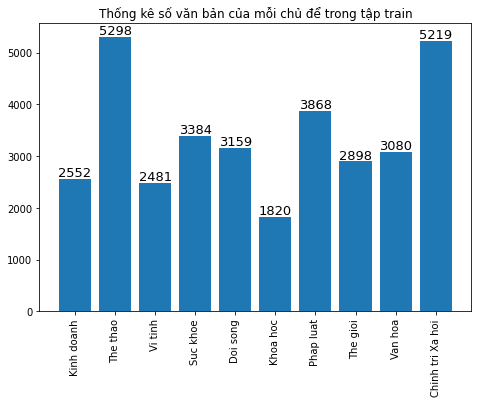

In [ ]:
# Số văn bản thuôc từng chủ đề của tập train 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
train_count = Counter(y_train)
ax.bar(list(train_count.keys()), list(train_count.values()))
# quay label đi 90 độ cho dễ nhìn
plt.xticks(rotation=90)
# Hiển thị giá trị trên từng cột
for index,data in enumerate(list(train_count.values())):
    plt.text(x=index , y = data + 50 , s=f"{data}" , fontdict=dict(fontsize=13), ha='center')
plt.title("Thống kê số văn bản của mỗi chủ để trong tập train")
plt.savefig("train.png", bbox_inches = 'tight')
plt.show()

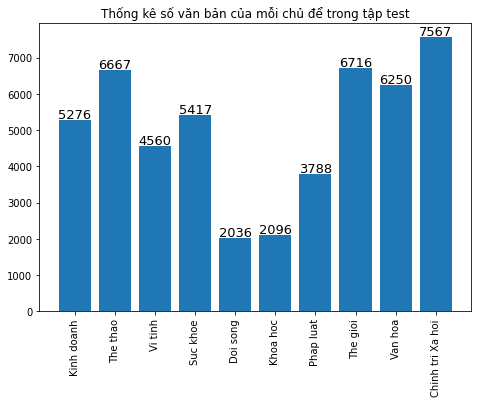

In [ ]:
# Số văn bản thuôc từng chủ đề của tập test
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
test_count = Counter(y_test)
ax.bar(list(test_count.keys()), list(test_count.values()))
# quay label đi 90 độ cho dễ nhìn
plt.xticks(rotation=90)
# Hiển thị giá trị trên từng cột
for index,data in enumerate(list(test_count.values())):
    plt.text(x=index , y = data + 50 , s=f"{data}" , fontdict=dict(fontsize=13), ha='center')
plt.title("Thống kê số văn bản của mỗi chủ để trong tập test")
plt.savefig("test.png", bbox_inches = 'tight')
plt.show()

# Tiền xử lý dữ liệu

Tiền xử lý dữ liệu tiếng Việt cho bài toán phân loại văn bản thường gồm các việc sau:

- Xóa HTML code (nếu có)
- Chuẩn hóa bảng mã Unicode (đưa về Unicode tổ hợp dựng sẵn)
- Chuẩn hóa kiểu gõ dấu tiếng Việt (dùng òa úy thay cho oà uý)
- Thực hiện tách từ tiếng Việt (sử dụng thư viện tách từ như pyvi, underthesea, vncorenlp,…)
- đưa về văn bản lower (viết thường)
- Xóa các ký tự đặc biệt: “.”, “,”, “;”, “)”, …

## Xóa HTML code trong dữ liệu

In [ ]:
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [ ]:
txt = "<p class=\"par\">This is an example.</p>"
remove_html(txt)

'This is an example.'

## Chuẩn hóa Unicode tiếng Việt

In [ ]:
'hiếu' == 'hiếu'

True

In [ ]:
'hiếu' == 'hiếu'

False

Nguyên nhân có lẽ là do người dùng sử dụng bộ mã khác nhau khi gõ tiếng Việt. Cụ thể đa số chúng ta đang dùng Unikey với bộ mã Unicode (dựng sẵn). Nhưng ở đâu đó, bộ mã Unicode tổ hợp vẫn được sử dụng. Do đó, đối với các nguồn dữ liệu thu thập trên internet thường bị lẫn cả 2 cách gõ này.

**Cách khắc phục:** Thay thế cách gõ Unicode tổ hợp bằng cách gõ của Unicode dựng sẵn.

In [ ]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
 

## Chuấn hóa kiểu gõ dấu

In [ ]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\\p{P}*)([p{L}.]*\\p{L}+)(\\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

In [ ]:
print(chuan_hoa_dau_cau_tieng_viet('anh hòa, đang làm.. gì'))

anh hòa, đang làm.. gì


## Tách từ tiếng Việt

In [ ]:
ViTokenizer.tokenize(u"Trường đại học bách khoa hà nội")

'Trường đại_học bách_khoa hà_nội'

## Đưa về viết thường (lowercase)
Việc đưa dữ liệu về chữ viết thường là rất cần thiết. Bởi vì đặc trưng này không có tác dụng ở bài toán phân loại văn bản. Đưa về chữ viết thường giúp giảm số lượng đặc trưng (vì máy tính hiểu hoa thường là 2 từ khác nhau) và tăng độ chính xác hơn cho mô hình.



## Xóa các ký tự không cần thiết
Tiền xử lý bao gồm việc loại bỏ các dữ liệu không có tác dụng cho việc phân loại văn bản. Việc này giúp:

- Giảm số chiều đặc trưng, tăng tốc độ học và xử lý
- Tránh làm ảnh hưởng xấu tới kết quả của mô hình

Các dấu ngắt câu, số đếm và các ký tự đặc biệt khác không giúp bạn phân loại một văn bản thuộc chuyên mục nào. Do đó, chúng ta nên loại bỏ nó đi.

Riêng với số đếm, ngày tháng, email (Các token đặc biệt). Nếu có thể, nên đưa nó về các token chung như: <number>, <date>, <email>, … Việc này có thể không giúp ích cho mô hình học tốt hơn nhưng sẽ giúp ích cho bạn trong việc giữ được mạch của dữ liệu.



## Tổng hợp của các bước trên

In [ ]:
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # tách từ
    # document = ViTokenizer.tokenize(document)
    # đưa về lower
    # document = document.lower()
    # xóa các ký tự không cần thiết
    # document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]','',document)
    # xóa khoảng trắng thừa
    # document = re.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
text = """TP HCM phạt người không đeo khẩu trang nơi công cộng.
Người dân ở thành phố không đeo khẩu trang nơi công cộng sẽ bị xử phạt mức cao nhất 300.000 đồng, từ ngày 5/8.
 
Yêu cầu này được Chủ tịch UBND thành phố Nguyễn Thành Phong đưa ra tại cuộc họp Ban chỉ đạo phòng chống dịch bệnh Covid-19 của TP HCM chiều 3/8.
 
Việc xử phạt không đeo khẩu trang nơi công cộng được TP HCM cũng như các địa phương khác thực hiện từ cuối tháng 3 khi Covid-19 bùng phát. Tuy nhiên, sau khi hết thực hiện cách ly xã hội từ ngày 23/4, việc đeo khẩu trang nơi công cộng chỉ dừng lại ở mức khuyến cáo.
 
Theo Nghị định số 176/2013, người dân không đeo khẩu trang nơi công cộng sẽ bị xử phạt từ 100.000 đến 300.000 đồng. Trong khoảng một tháng áp dụng trước đó, TP HCM đã xử phạt hơn 4.300 trường hợp với gần 870 triệu đồng.
 
Theo ông Phong, việc đeo khẩu trang đã được khẳng định có thể tránh lây lan dịch bệnh cho người khác và bảo vệ sức khỏe cho người sử dụng. "Sở Công thương phải nắm nguồn cung ứng khẩu trang, chủ động thông báo các điểm bán để người dân dễ dàng mua vì đã xử phạt thì phải bảo đảm đủ nguồn cung", ông Phong nói.
 
Đội trật tự đô thị phường Bến Nghé, quận 1, xử phạt người không đeo khẩu trang trên phố đi bộ Nguyễn Huệ, chiều 15/4. Ảnh: Quỳnh Trần.
Đội trật tự đô thị phường Bến Nghé, quận 1, xử phạt người không đeo khẩu trang trên phố đi bộ Nguyễn Huệ, chiều 15/4. Ảnh: Quỳnh Trần.
 
Bí thư Thành uỷ Nguyễn Thiện Nhân cũng cho rằng việc đeo khẩu trang là một trong những biện pháp cơ bản để tránh dịch bệnh lây lan. Việc này rất dễ làm, không tốn nhiều tiền nhưng nhiều nước bỏ lơi và đã bị "vỡ trận".
 
"Ngoài đường hiện có ít nhất 20% người không đeo khẩu trang. Người không đeo không những tự rước bệnh vào mình mà còn nguy cơ lây cho người khác. Đeo khẩu trang hơi cực tí thôi nhưng đi đâu cũng nên đeo để giữ an toàn", ông Nhân nói và khẳng định thành phố bảo đảm không thiếu khẩu trang cho người dân.
 
Chủ tịch UBND thành phố Nguyễn Thành Phong cũng cho biết đã đồng ý việc tái lập các chốt kiểm soát ở cửa ngõ TP HCM để phòng chống Covid-19.
 
Trước đó, thành phố đã lập 62 chốt kiểm soát, hoạt động 24/24 từ ngày 4/4 để phòng chống dịch. Lực lượng tham gia là Công an thành phố, Sở Y tế, Bộ Tư lệnh thành phố, Thanh tra giao thông, Ban Quản lý An toàn thực phẩm, quản lý thị trường.
 
Trong đó, 16 chốt chính (cấp thành phố) đặt tại: Trạm thu phí Long Phước (cao tốc TP HCM - Long Thành - Dầu Giây), cao tốc Trung Lương, cầu Đôi (đường Trần Văn Giàu), đường Ba Làng, đường Xuyên Á (quốc lộ 22), cầu Phú Cường, cầu Vĩnh Bình, cầu vượt Sóng Thần, quốc lộ 1K, quốc lộ 50, quốc lộ 1A, cầu Đồng Nai, Bến xe Miền Tây, Bến xe miền Đông, sân bay Tân Sơn Nhất, cảng Cát Lái.
 
Đến ngày 23/4, chính quyền thành phố dừng hoạt động các chốt này vì dịch bệnh đã được khống chế, TP HCM dừng cách ly xã hội theo Chỉ thị 19 của Thủ tướng.
 
Sau 19 ngày hoạt động, các chốt chính đã kiểm tra gần 270.000 xe, trong đó có 235.000 ôtô; gần 600.000 người được kiểm tra y tế, đo thân nhiệt, bao gồm cả 3.000 người nước ngoài; hơn 130.000 người được yêu cầu khai báo y tế.
 """

In [ ]:
text_preprocess(text)

'tp hcm phạt người không đeo khẩu trang nơi công cộng. người dân ở thành phố không đeo khẩu trang nơi công cộng sẽ bị xử phạt mức cao nhất 300.000 đồng, từ ngày 58. yêu cầu này được chủ tịch ubnd thành phố nguyễn thành phong đưa ra tại cuộc họp ban chỉ đạo phòng chống dịch bệnh covid-19 của tp hcm chiều 38. việc xử phạt không đeo khẩu trang nơi công cộng được tp hcm cũng như các địa phương khác thực hiện từ cuối tháng 3 khi covid-19 bùng phát. tuy nhiên, sau khi hết thực hiện cách ly xã hội từ ngày 234, việc đeo khẩu trang nơi công cộng chỉ dừng lại ở mức khuyến cáo. theo nghị định số 1762013, người dân không đeo khẩu trang nơi công cộng sẽ bị xử phạt từ 100.000 đến 300.000 đồng. trong khoảng một tháng áp dụng trước đó, tp hcm đã xử phạt hơn 4.300 trường hợp với gần 870 triệu đồng. theo ông phong, việc đeo khẩu trang đã được khẳng định có thể tránh lây lan dịch bệnh cho người khác và bảo vệ sức khỏe cho người sử dụng. "sở công thương phải nắm nguồn cung ứng khẩu trang, chủ động thông b

In [ ]:
X_train_set = X_train.copy()
y_train_set = y_train.copy()
X_test_set = X_test.copy()
y_test_set = y_test.copy()

In [ ]:
# tiền xử lý train và test
X_train = [text_preprocess(doc) for doc in X_train]
X_test = [text_preprocess(doc) for doc in X_test]

In [ ]:
X_train[0]

'tổng_thống bolivia e morales ngày 1 5 đã ký sắc_lệnh quốc hữu_hóa lĩnh_vực dầu_khí của nước này và dọa sẽ trục_xuất các công_ty nước_ngoài nếu họ không nhường quyền kiểm_soát việc sản_xuất cho chính_phủ trong vòng 6 tháng thực_hiện quyết_định trên các binh_sĩ và kỹ_sư đã được phái đến 56 địa_điểm khai_thác dầu_mỏ và lọc dầu trên khắp đất_nước phát_biểu tại một mỏ dầu ở miền nam tổng_thống morales gọi đây là một ngày lịch_sử tình_trạng các công_ty nước_ngoài cướp_bóc tài_nguyên thiên_nhiên của chúng_ta đã chấm_dứt ông tuyên_bố theo nhà lãnh_đạo quốc_gia nghèo nhất nam mỹ nhưng có lượng dự_trữ khí_đốt nhiều thứ nhì khu_vực này việc lấy lại quyền sở_hữu tài_nguyên thiên_nhiên của đất_nước là một phương_tiện cơ_bản để khôi_phục lại chủ_quyền của chúng_ta ông cũng thêm rằng việc quốc hữu_hóa lĩnh_vực dầu_khí chỉ mới là sự khởi_đầu bởi sau đó sẽ đến lượt các hầm_mỏ tài_nguyên rừng và đất_đai các công_ty nước_ngoài như bp total exxon mobil petrobras có 6 tháng để đồng_ý hợp_đồng mới với chín

In [ ]:
# Lưu lại cho lần sau khỏi phải xử lý
with open("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/xTrain.txt", "w",encoding='utf-8') as f:
  for doc in X_train:
    f.write(doc + "\n")

with open("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/yTrain.txt", "w",encoding='utf-8') as f:
  for doc in y_train:
    f.write(doc + "\n")

with open("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/xTest.txt", "w",encoding='utf-8') as f:
  for doc in X_test:
    f.write(doc + "\n")

with open("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/yTest.txt", "w",encoding='utf-8') as f:
  for doc in y_test:
    f.write(doc + "\n")


## Loại bỏ các stopword tiếng Việt

In [ ]:
# Danh sách stopword
with open("/content/drive/MyDrive/Text Classification/data/vietnamese-stopwords.txt",
          encoding='utf-8') as f:
    stopword = list(set(f.read().split("\n")))
 
def remove_stopwords(doc):
    words = []
    for word in doc.split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [ ]:
remove_stopwords("rằng tôi là trường đại học")

'trường đại học'

In [ ]:
X_train = [remove_stopwords(doc) for doc in X_train]
X_test = [remove_stopwords(doc) for doc in X_test]

# Model

In [2]:
with open("/content/drive/MyDrive/Text Classification/data/xTrain.txt",encoding='utf-8') as f:
    X_train = f.read().split("\n")[:-1]

with open("/content/drive/MyDrive/Text Classification/data/yTrain.txt",encoding='utf-8') as f:
  y_train = f.read().split("\n")[:-1]

with open("/content/drive/MyDrive/Text Classification/data/xTest.txt",encoding='utf-8') as f:
  X_test = f.read().split("\n")[:-1]

with open("/content/drive/MyDrive/Text Classification/data/yTest.txt",encoding='utf-8') as f:
  y_test = f.read().split("\n")[:-1]

In [ ]:
X_train[0]

'tổng_thống bolivia e morales ngày 1 5 đã ký sắc_lệnh quốc hữu_hóa lĩnh_vực dầu_khí của nước này và dọa sẽ trục_xuất các công_ty nước_ngoài nếu họ không nhường quyền kiểm_soát việc sản_xuất cho chính_phủ trong vòng 6 tháng thực_hiện quyết_định trên các binh_sĩ và kỹ_sư đã được phái đến 56 địa_điểm khai_thác dầu_mỏ và lọc dầu trên khắp đất_nước phát_biểu tại một mỏ dầu ở miền nam tổng_thống morales gọi đây là một ngày lịch_sử tình_trạng các công_ty nước_ngoài cướp_bóc tài_nguyên thiên_nhiên của chúng_ta đã chấm_dứt ông tuyên_bố theo nhà lãnh_đạo quốc_gia nghèo nhất nam mỹ nhưng có lượng dự_trữ khí_đốt nhiều thứ nhì khu_vực này việc lấy lại quyền sở_hữu tài_nguyên thiên_nhiên của đất_nước là một phương_tiện cơ_bản để khôi_phục lại chủ_quyền của chúng_ta ông cũng thêm rằng việc quốc hữu_hóa lĩnh_vực dầu_khí chỉ mới là sự khởi_đầu bởi sau đó sẽ đến lượt các hầm_mỏ tài_nguyên rừng và đất_đai các công_ty nước_ngoài như bp total exxon mobil petrobras có 6 tháng để đồng_ý hợp_đồng mới với chín

## Naive Bayes

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_), '\n')
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train[0], y_train[0])
print(X_test[0], y_test[0])

['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh', 'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa', 'Vi tinh'] 

tổng_thống bolivia orales <number> ký sắc_lệnh quốc hữu hóa lĩnh_vực dầu_khí dọa trục_xuất công_ty nước_ngoài nhường quyền kiểm_soát sản_xuất chính_phủ vòng <number> thực_hiện quyết_định binh_sĩ kỹ_sư phái <number> địa_điểm khai_thác dầu_mỏ lọc dầu khắp đất_nước phát_biểu mỏ dầu miền nam tổng_thống morales gọi lịch_sử tình_trạng công_ty nước_ngoài cướp_bóc tài_nguyên thiên_nhiên chúng_ta chấm_dứt tuyên_bố lãnh_đạo quốc_gia nghèo nam_mỹ dự_trữ khí_đốt nhì khu_vực quyền_sở_hữu tài_nguyên thiên_nhiên đất_nước phương_tiện cơ_bản khôi_phục chủ_quyền chúng_ta quốc hữu hóa lĩnh_vực dầu_khí khởi_đầu lượt hầm_mỏ tài_nguyên rừng đất_đai công_ty nước_ngoài bp total exxon_mobil petrobras <number> đồng_ý hợp_đồng chính_phủ rời bolivia vòng thập_niên công_ty ngoại_quốc khai_thác xuất_khẩu khí_đốt bolivia đầu_tư <number> tỉ usd ap 6
london săn_lùng thủ_phạm đánh bom cảnh

In [14]:
import pickle
import numpy as np
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline

In [ ]:
# dung tf-idf
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ], verbose=True)
text_clf = text_clf.fit(X_train, y_train)

train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')

[Pipeline] .............. (step 1 of 3) Processing vect, total=  11.7s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.6s
[Pipeline] ............... (step 3 of 3) Processing clf, total=   0.2s
Done training Naive Bayes in 12.520370960235596 seconds.


In [ ]:
len(text_clf['vect'].get_feature_names())

110941

In [ ]:
# dung tan suat
start_time = time.time()
text_clf1 = Pipeline([('vect', CountVectorizer()), 
                    #  ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ], verbose=True)
text_clf1 = text_clf1.fit(X_train, y_train)

train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')

[Pipeline] .............. (step 1 of 2) Processing vect, total=  10.6s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
Done training Naive Bayes in 10.739747047424316 seconds.


In [ ]:
# Save model
with open("/content/drive/MyDrive/Text Classification/model/naive_bayes_frequenyc.pkl", "wb") as f:
  pickle.dump(text_clf1, f)

In [ ]:
text_clf

In [ ]:
text_clf1

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=True)

## Đánh giá

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = text_clf.predict(X_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))

Naive Bayes, Accuracy = 0.8274273916582296


In [ ]:
y_pred = text_clf1.predict(X_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))

Naive Bayes, Accuracy = 0.8954400174696762


In [ ]:
# Xem kết qủa trên từng nhãn - tf-idf
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.55      0.97      0.70      7567
        Doi song       0.71      0.59      0.65      2036
        Khoa hoc       0.98      0.25      0.39      2096
      Kinh doanh       0.97      0.57      0.72      5276
       Phap luat       0.89      0.87      0.88      3788
        Suc khoe       0.89      0.92      0.90      5417
        The gioi       0.97      0.81      0.88      6716
        The thao       0.96      0.98      0.97      6667
         Van hoa       0.93      0.90      0.91      6250
         Vi tinh       0.96      0.82      0.88      4560

        accuracy                           0.83     50373
       macro avg       0.88      0.77      0.79     50373
    weighted avg       0.87      0.83      0.83     50373



In [ ]:
# Xem kết qủa trên từng nhãn - frequency
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.82      0.86      0.84      7567
        Doi song       0.69      0.74      0.72      2036
        Khoa hoc       0.83      0.73      0.78      2096
      Kinh doanh       0.89      0.89      0.89      5276
       Phap luat       0.86      0.92      0.89      3788
        Suc khoe       0.93      0.92      0.93      5417
        The gioi       0.93      0.92      0.92      6716
        The thao       0.99      0.94      0.97      6667
         Van hoa       0.91      0.93      0.92      6250
         Vi tinh       0.94      0.91      0.92      4560

        accuracy                           0.90     50373
       macro avg       0.88      0.88      0.88     50373
    weighted avg       0.90      0.90      0.90     50373



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in list(label_encoder.classes_)],
                  columns = [i for i in list(label_encoder.classes_)])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='True Label')
plt.show()

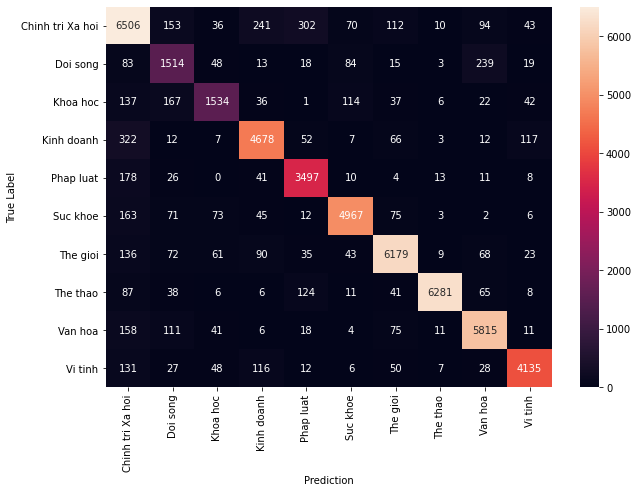

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in list(label_encoder.classes_)],
                  columns = [i for i in list(label_encoder.classes_)])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='True Label')
plt.savefig("Confution matrix.png", bbox_inches = 'tight')
plt.show()

## Thay đổi phân bố dữ liệu trên tập train

In [ ]:
indexPerClass = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for id, label in enumerate(y_test):
  indexPerClass[label].append(id)

In [ ]:
import random

In [ ]:
samplePerClass = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for label in indexPerClass.keys():
  samplePerClass[label] = random.sample(indexPerClass[label], 1800)

In [ ]:
newX_test = []
newy_test = []
for label in samplePerClass.keys():
  for idx in samplePerClass[label]:
    newX_test.append(X_test[idx])
    newy_test.append(y_test[idx])

In [ ]:
len(newy_test)

18000

In [ ]:
# dung tan suat
start_time = time.time()
text_clf1 = Pipeline([('vect', CountVectorizer()), 
                    #  ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ], verbose=True)
text_clf1 = text_clf1.fit(newX_train, newy_train)

train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')

[Pipeline] .............. (step 1 of 2) Processing vect, total=   3.2s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
Done training Naive Bayes in 3.2479634284973145 seconds.


In [ ]:
y_pred = text_clf1.predict(newX_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == newy_test))

Naive Bayes, Accuracy = 0.8770555555555556


Kết qủa còn thấp hơn. Vậy mức độ phân bố trên mỗi lớp không ảnh hưởng mấy đến việc dự đoán của mô hình

In [ ]:
# Xem kết qủa trên từng nhãn - frequency
print(classification_report(newy_test, y_pred, target_names=list(label_encoder.classes_)))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.72      0.85      0.78      1800
        Doi song       0.83      0.75      0.78      1800
        Khoa hoc       0.91      0.74      0.82      1800
      Kinh doanh       0.90      0.89      0.89      1800
       Phap luat       0.91      0.91      0.91      1800
        Suc khoe       0.88      0.91      0.90      1800
        The gioi       0.90      0.93      0.91      1800
        The thao       0.98      0.95      0.97      1800
         Van hoa       0.84      0.92      0.88      1800
         Vi tinh       0.93      0.92      0.92      1800

        accuracy                           0.88     18000
       macro avg       0.88      0.88      0.88     18000
    weighted avg       0.88      0.88      0.88     18000



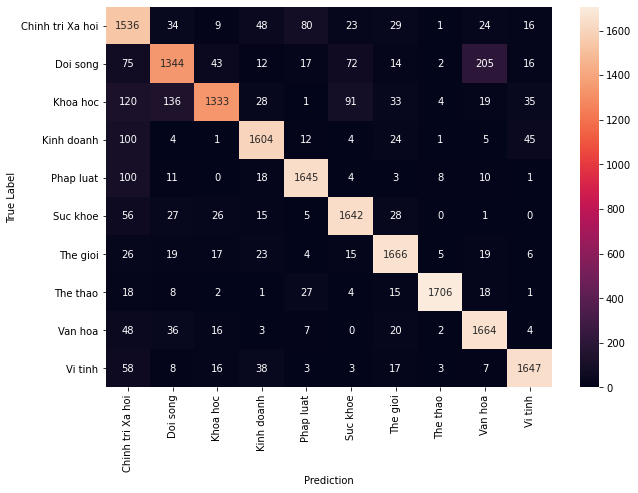

In [ ]:
cm = confusion_matrix(newy_test, y_pred)
# print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in list(label_encoder.classes_)],
                  columns = [i for i in list(label_encoder.classes_)])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='True Label')
plt.savefig("Confution matrix.png", bbox_inches = 'tight')
plt.show()

## Xem số từ trùnng nhau giữa các lớp

In [7]:
vocabPerClass = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for id, label in enumerate(y_train):
  temp = X_train[id].split()
  vocabPerClass[label] = vocabPerClass[label] + temp

In [ ]:
vocabPerClass[0]

In [9]:
# tinh tan suat xuat hien cua cac tu tren tung Class
frequencyPerClass = {}
for label in vocabPerClass.keys():
  frequencyPerClass[label] = Counter(vocabPerClass[label])

In [10]:
for label in vocabPerClass.keys():
  vocabPerClass[label] = list(set(vocabPerClass[label]))

In [11]:
# tinh so tu trung lap giua cac Class
insertionPerClass = np.zeros((10,10))
for i in range(10):
  for j in range(10):
    if i == j:
      insertionPerClass[i][j] = len(vocabPerClass[i])
    else:
      for word in vocabPerClass[i]:
        if word in vocabPerClass[j]:
          insertionPerClass[i][j] += 1

In [12]:
insertionPerClass = np.array(insertionPerClass, dtype='int32')

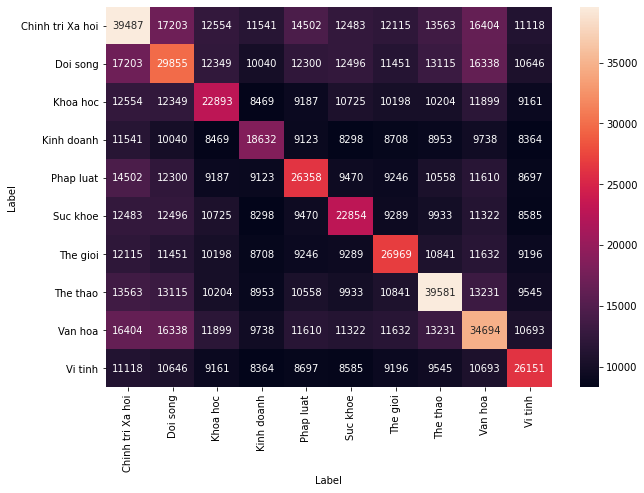

In [13]:
df_insert = pd.DataFrame(insertionPerClass, index = [i for i in list(label_encoder.classes_)],
                  columns = [i for i in list(label_encoder.classes_)])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_insert, annot=True, fmt='d')
ax.set(xlabel='Label', ylabel='Label')
# plt.savefig("Confution matrix.png", bbox_inches = 'tight')
plt.show()

In [ ]:
falseIndexes = []
for id, pred in enumerate(y_pred):
  if pred != y_test[id]:
    falseIndexes.append(id)

In [ ]:
falseIndexes[1]

23

In [ ]:
X_test[23]

'tp hcm thắng cương vật_liệu xây_dựng sở xây_dựng tp hcm triển_khai công_tác quản_lý ngành vật_liệu xây_dựng địa_bàn thành_phố nghị_định 16cp tuy_nhiên quản_lý khó_khăn đầu_tiên sở nắm thông_tin ngành vật_liệu xây_dựng kiến_trúc_sư chu bình đà trưởng_phòng quản_lý doanh_nghiệp sở xây_dựng trực_tiếp soạn_thảo đề_án quản_lý ngành vật_liệu xây_dựng tp hcm 2005 sở bắt_tay quản_lý khâu đầu_tiên tập_hợp thông_tin doanh_nghiệp chuyên_ngành thị_trường công_việc quản_lý khó_khăn hiệu_quả nghị_định chính_phủ ban_hành đầu 2 3 sở xây_dựng dự_thảo đề_án quản_lý trình ubnd thành_phố ý_kiến thời_gian sở xây_dựng văn_bản gởi vụ vật_liệu xây_dựng xây_dựng sở ngành huyện tổng công_ty khu công_nghiệp khu chế_xuất khu công_nghệ_cao đề_nghị hợp_tác nâng hiệu_quả quản_lý nhà_nước ngành vật_liệu xây_dựng nguyễn văn hiệp phó_giám_đốc sở xây_dựng quản_lý ngành vật_liệu xây_dựng vấn_đề bức_xúc đối_với chủ đầu_tư công_trình xây_dựng hiện_nay sở công_tác hệ_thống quản_lý 2000 sở kế_hoạch đầu_tư giấy_phép đăng_ký 

In [ ]:
label_encoder.inverse_transform([y_test[23], y_pred[23]])

array(['Kinh doanh', 'Chinh tri Xa hoi'], dtype='<U16')